# 확장 프로젝트 4: 영화 산업 지표와 영화 제작 수 지표 비교

### 가정: 기존 IMDB TOP 1000 발견된 데이터의 흐름이 영화수 제작 자체도 같은 흐름을 가질 것이다.
#### - 1920~1950년대: 영화 수 증가(할리우드 황금기, 신기술 도입, 영화의 대중문화화)
#### - 1960~1980년대: 영화 수 감소(TV보급, 스튜디오 시스템 붕괴, 제작 비용 상승)
#### - 1990년대 이후: 영화 수 급증(디지털 기술 확산, 유통 채널 다양화)

## 데이터 확인

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "title.basics.tsv", 
    sep="\t",            
    dtype=str,           
    na_values="\\N"       
)

print(df.columns)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


## 데이터 전처리

In [6]:
# 1. 영화만 필터링
movies = df[df["titleType"] == "movie"].copy()

# 2. 결측치 제거 + 숫자로 변환
movies = movies[movies["startYear"].notna()]
movies["startYear"] = pd.to_numeric(movies["startYear"], errors="coerce")

# 3. 1920~2029 사이만 선택 (2020년대까지 포함하려고 upper bound는 2020)
movies = movies[(movies["startYear"] >= 1920) & (movies["startYear"] <= 2020)]

# 4. 10년 단위로 그룹핑 (예: 1920~1929 → 1920s)
movies["decade"] = (movies["startYear"] // 10) * 10

# 5. 집계
decade_counts = (
    movies.groupby("decade")["tconst"]
    .count()
    .reset_index(name="movie_count")
    .sort_values("decade")
)

print(decade_counts)

    decade  movie_count
0     1920        22098
1     1930        20594
2     1940        14735
3     1950        23855
4     1960        31860
5     1970        40534
6     1980        44247
7     1990        46076
8     2000        78501
9     2010       168720
10    2020        16714


## 데이터 시각화

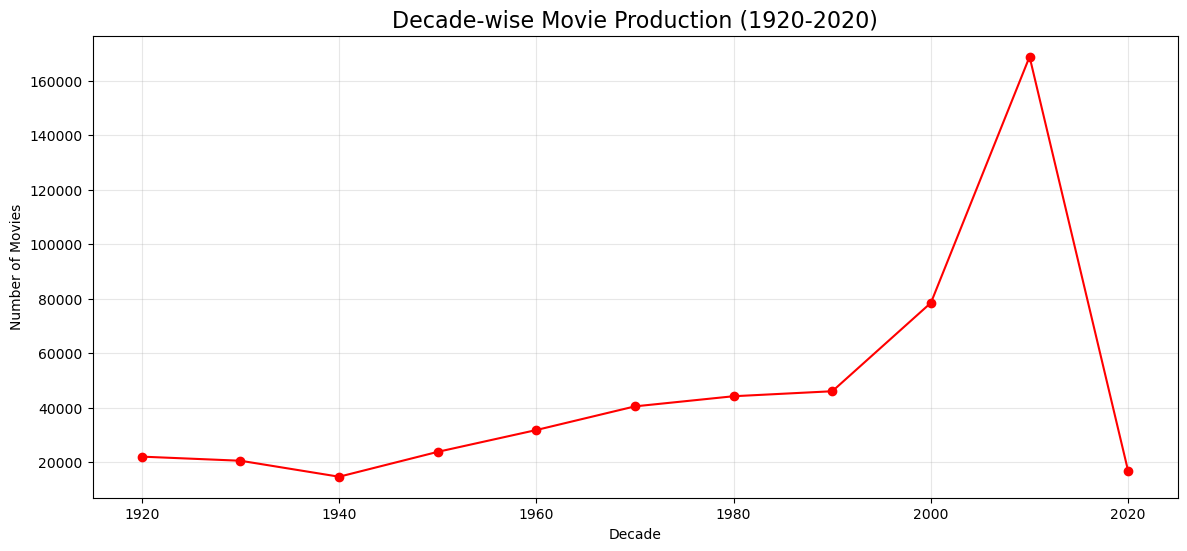

In [7]:
plt.figure(figsize=(14,6))
plt.plot(decade_counts['decade'], decade_counts['movie_count'], marker='o', color='red')
plt.title("Decade-wise Movie Production (1920-2020)", fontsize=16)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.grid(True, alpha=0.3)
plt.show()

### 실제 데이터 흐름
#### - 1920~1940년대: 영화 수 감소
#### - 1940~1960년대: 영화 수 증가
#### - 1960~1990년대: 영화 수 증감 없음
#### - 1990이후: 영화 수 급격히 증가